In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv("perch2.csv") # 회귀.

X = df.drop("weight", axis = 1).values
Y = df['weight'].values

train_x, test_x, train_y, test_y = train_test_split(X, Y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [2]:
from tensorflow import keras
from keras.layers import Dense, Dropout, Input, BatchNormalization, Activation

model = keras.Sequential([
    Input(shape = (3,)),
    
    Dense(8),
    BatchNormalization(),
    Activation('relu'),
    # Dropout(0.3),
    
    Dense(1)
])

model.compile(loss = "mse", optimizer="adam", metrics=['mae'])

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_scaled, train_y, epochs = 1000,
                    validation_data=(test_scaled, test_y),
                    callbacks = [es])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - loss: 301328.1562 - mae: 413.3819 - val_loss: 153420.0156 - val_mae: 282.1642
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 303296.5938 - mae: 421.0388 - val_loss: 153411.1094 - val_mae: 282.1468
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 309848.8750 - mae: 423.1146 - val_loss: 153403.0156 - val_mae: 282.1313
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 321579.7188 - mae: 430.3583 - val_loss: 153395.0312 - val_mae: 282.1164
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 302052.4688 - mae: 413.2664 - val_loss: 153387.6719 - val_mae: 282.1026
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 295091.6250 - mae: 412.4434 - val_loss: 153379.6719 - val_mae: 282.0872
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 303443.0000 - mae: 412.8300 - val_loss: 153372.3594 - val_mae: 282.0739
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 296118.5938 - mae: 409.

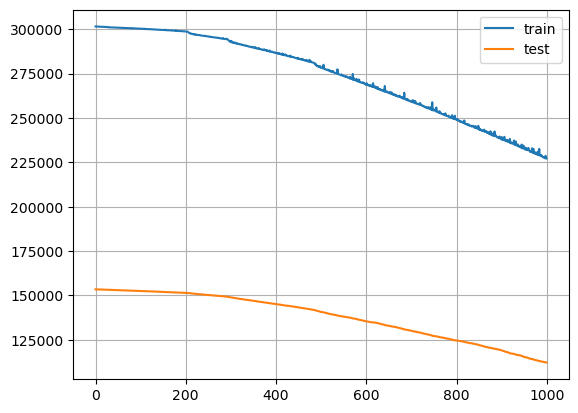

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'])
plt.grid()
plt.show()

In [7]:
df = pd.read_csv("boston_house_prices.csv")

X = df.drop("MEDV", axis = 1).values
Y = df['MEDV'].values

train_x, test_x, train_y, test_y = train_test_split(X, Y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [8]:
model = keras.Sequential([
    Input(shape = (13,)),
    
    Dense(32),
    Activation('relu'),
    
    Dense(1)
])

model.compile(loss = "mse", optimizer="adam", metrics=['mae'])

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_scaled, train_y, epochs = 1000,
                    validation_data=(test_scaled, test_y),
                    callbacks = [es])

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 652.7679 - mae: 23.4893 - val_loss: 492.8014 - val_mae: 20.5574
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 614.7714 - mae: 22.7442 - val_loss: 481.5938 - val_mae: 20.2832
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 608.5311 - mae: 22.5395 - val_loss: 470.4321 - val_mae: 20.0043
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 581.7221 - mae: 22.0239 - val_loss: 459.0167 - val_mae: 19.7193
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 560.5078 - mae: 21.7104 - val_loss: 447.4686 - val_mae: 19.4236
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 569.6894 - mae: 21.6957 - val_loss: 435.4595 - val_mae: 19.1135
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 543.4297 - mae: 21.3086 - val_loss: 422.8519 - val_mae: 18.7898
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 583.4540 - mae: 21.7277 - val_loss: 409.5522 - val_mae: 18.4413
Epoch 9

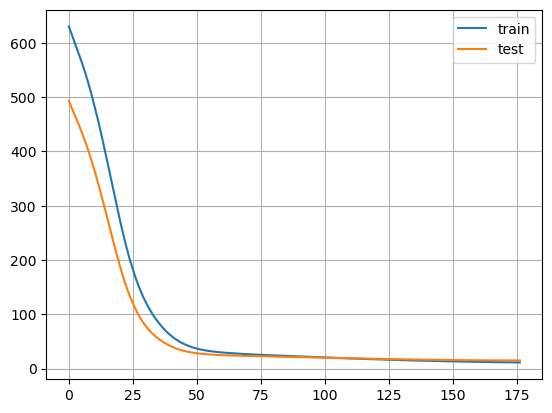

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'])
plt.grid()
plt.show()

In [24]:
df = pd.read_excel("리뷰 데이터.xlsx")

train_x, test_x, train_y, test_y = train_test_split(df['sentence'],
                                                    df['label'])

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 사용할 단어 개수. (가장 많이 사용된 단어 순으로 1등~1000등까지 사용한다.)
vocab_size = 1000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_x)

In [30]:
tokenizer.word_index

{'<OOV>': 1,
 '이': 2,
 '기대': 3,
 '음악은': 4,
 '제품은': 5,
 '경험은': 6,
 '서비스는': 7,
 '여행은': 8,
 '강의는': 9,
 '영화는': 10,
 '책은': 11,
 '음식은': 12,
 '앱은': 13,
 '정말': 14,
 '아주': 15,
 '행복했어요': 16,
 '다시는': 17,
 '이용하지': 18,
 '않을래요': 19,
 '이하였어요': 20,
 '이상이었어요': 21,
 '최악이에요': 22,
 '매우': 23,
 '유용했어요': 24,
 '도움이': 25,
 '되지': 26,
 '않았어요': 27,
 '좋았어요': 28,
 '다시': 29,
 '이용하고': 30,
 '싶어요': 31,
 '훌륭했어요': 32,
 '추천합니다': 33,
 '최고예요': 34,
 '불쾌했어요': 35,
 '불만족입니다': 36,
 '감동적이었어요': 37,
 '실망했어요': 38,
 '만족합니다': 39,
 '비추천합니다': 40,
 '별로였어요': 41,
 '형편없었어요': 42}

In [32]:
train_seq = tokenizer.texts_to_sequences(train_x)
test_seq = tokenizer.texts_to_sequences(test_x)

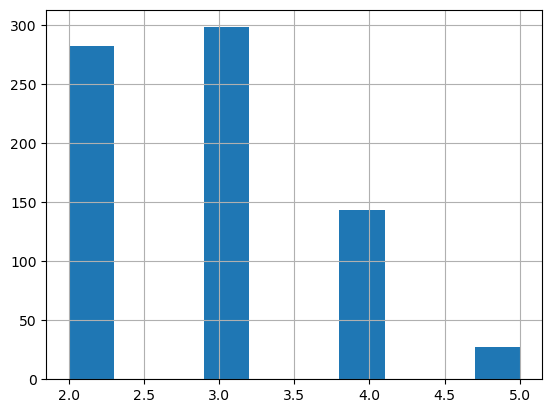

In [37]:
box = []
for i in train_seq:
    box.append(len(i))

plt.hist(box)
plt.grid()
plt.show()

In [40]:
from keras.preprocessing.sequence import pad_sequences

train_seq2 = pad_sequences(train_seq, 10)
test_seq2 = pad_sequences(test_seq, 10)

In [46]:
train_oh = keras.utils.to_categorical(train_seq2)
test_oh = keras.utils.to_categorical(test_seq2)

In [47]:
train_oh[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0.,

In [49]:
train_oh.shape # 단어가 10개 있고, 단어는 총 43개.

(750, 10, 43)

In [50]:
from keras.layers import SimpleRNN, LSTM

model = keras.Sequential([
    Input(shape = (10, 43)),
    SimpleRNN(32),
    Dense(2, activation="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,498 (9.76 KB)

 Trainable params: 2,498 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(train_oh, train_y, epochs = 100,
         validation_data=(test_oh, test_y),
        callbacks=[es])

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5782 - loss: 0.6859 - val_accuracy: 0.6720 - val_loss: 0.5886
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7539 - loss: 0.5288 - val_accuracy: 0.7840 - val_loss: 0.4931
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8503 - loss: 0.4456 - val_accuracy: 0.8480 - val_loss: 0.4177
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9065 - loss: 0.3574 - val_accuracy: 0.9800 - val_loss: 0.3287
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9817 - loss: 0.2872 - val_accuracy: 0.9880 - val_loss: 0.2616
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.2295 - val_accuracy: 0.9960 - val_loss: 0.2070
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1812 - val_accuracy: 1.0000 - val_loss: 0.1597
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1408 - val_accuracy: 1.0000 - 

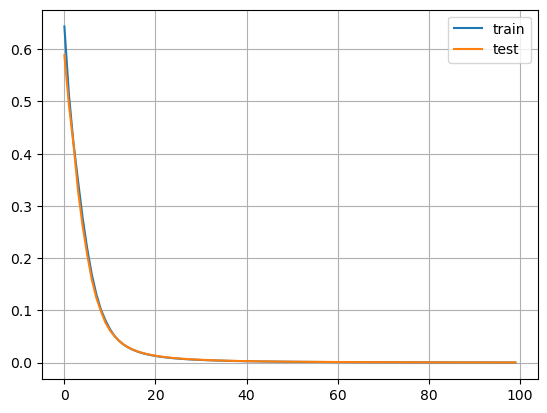

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'])
plt.grid()
plt.show()

In [59]:
text = ['음악은 형편없었어요.']
A = tokenizer.texts_to_sequences(text)
A = pad_sequences(A, 10)
A = keras.utils.to_categorical(A, num_classes=43)
model.predict(A)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0.99896777, 0.0010323 ]], dtype=float32)

In [61]:
import numpy as np
np.round(model.predict(A), 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0.999, 0.001]], dtype=float32)

In [65]:
model = keras.Sequential([
    Input(shape = (10, 43)),
    LSTM(32),
    Dense(2, activation="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 32)                  │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,794 (38.26 KB)

 Trainable params: 9,794 (38.26 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
9794/4

2448.5

In [66]:
model = keras.Sequential([
    Input(shape = (10, 43)),
    LSTM(32, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(2, activation="softmax")
])

In [72]:
from keras.layers import Embedding

model = keras.Sequential([
    Input(shape = (10,)),
    Embedding(input_dim = 1000, output_dim = 4),
    LSTM(32),
    Dense(2, activation="softmax")
])

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_seq2, train_y, epochs = 1000,
                    validation_data=(test_seq2, test_y),
                    callbacks=[es])

Epoch 1/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5305 - loss: 0.6898 - val_accuracy: 0.5200 - val_loss: 0.6810
Epoch 2/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5558 - loss: 0.6756 - val_accuracy: 0.6120 - val_loss: 0.6509
Epoch 3/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6586 - loss: 0.6326 - val_accuracy: 0.7760 - val_loss: 0.5803
Epoch 4/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8226 - loss: 0.5447 - val_accuracy: 0.9640 - val_loss: 0.4374
Epoch 5/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9678 - loss: 0.3694 - val_accuracy: 0.9960 - val_loss: 0.2023
Epoch 6/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1501 - val_accuracy: 1.0000 - val_loss: 0.0672
Epoch 7/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0555 - val_accuracy: 1.0000 - val_loss: 0.0302
Epoch 8/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0255 - val_accuracy: 1

In [78]:
(train_x, train_y), (test_x, test_y) = keras.datasets.imdb.load_data(num_words=500) # imdb : 영화 리뷰 (긍정1, 부정0) // OOV : 2

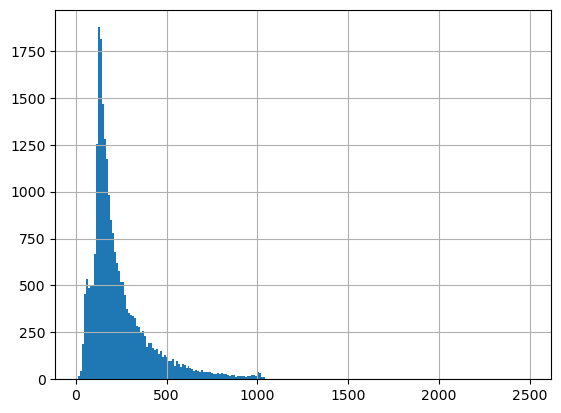

In [80]:
box = []
for i in train_x:
    box.append(len(i))
plt.hist(box, bins = 'auto')
plt.grid()
plt.show()

In [88]:
# pre:앞에서부터, post: 뒤에서부터.
train_seq = pad_sequences(train_x, 500, padding='pre', truncating="pre")
test_seq = pad_sequences(test_x, 500, padding='pre', truncating="pre")

model = keras.Sequential([
    Input(shape = (500,)),
    Embedding(input_dim=500, output_dim=100),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(loss = "binary_crossentropy",
              metrics=['accuracy'],
              optimizer="adam")

history = model.fit(train_seq, train_y, epochs = 10,
                    validation_data=(test_seq, test_y))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 176ms/step - accuracy: 0.6120 - loss: 0.6421 - val_accuracy: 0.7724 - val_loss: 0.4902
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 219ms/step - accuracy: 0.7406 - loss: 0.5272 - val_accuracy: 0.6568 - val_loss: 0.6078
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 219s 280ms/step - accuracy: 0.7457 - loss: 0.5253 - val_accuracy: 0.7431 - val_loss: 0.5549
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 265ms/step - accuracy: 0.7132 - loss: 0.5616 - val_accuracy: 0.8013 - val_loss: 0.4542
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 238s 234ms/step - accuracy: 0.8010 - loss: 0.4467 - val_accuracy: 0.8100 - val_loss: 0.4209
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 224s 286ms/step - accuracy: 0.8050 - loss: 0.4346 - val_accuracy: 0.8266 - val_loss: 0.3777
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 218s 279ms/step - accuracy: 0.8537 - loss: 0.3417 - val_accuracy: 0.8562 - val_loss: 0.3335
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 215s 275ms/step - accuracy: 0.8546 -